<a href="https://colab.research.google.com/github/Z4phxr/Linear-Regression-Study/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import csv
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Ridge Regression (L2 Regularization)

Ridge Regression is a type of linear regression that uses L2 regularization to reduce overfitting and improve generalization. It works by adding a penalty to large coefficient values, which forces the model to stay simpler.



he Ridge model minimizes a modified loss function:

$$
\text{Loss} = \sum (y - \hat{y})^2 + \lambda \sum w^2
$$

- The first term is the usual **Mean Squared Error (MSE)**.  
- The second term is the **regularization penalty** (**L2 norm**).  
- **λ (lambda)** controls the strength of regularization:
  - **λ = 0** → Ridge becomes normal linear regression.  
  - **High λ** → stronger shrinkage, simpler model.  

Ridge does **not** set coefficients to exactly zero, so it **keeps all features**, just reduces their influence.

In [47]:
x = []
y = []
with open("/content/data4.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        x.append([float(row[0])])
        y.append(float(row[1]))

In [48]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=22)

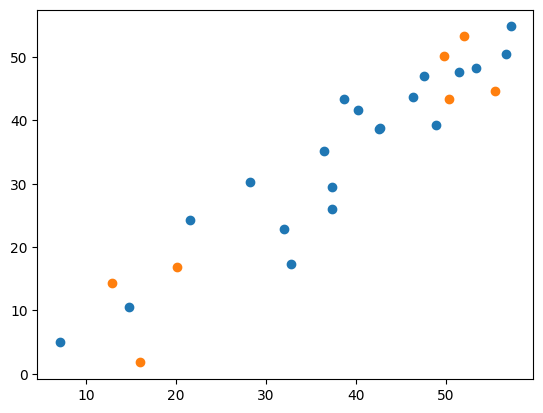

In [49]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [50]:
X = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=22)

In [51]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train_scaled, y_train)

rd = sklearn.linear_model.Ridge(alpha=10)
rd.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [53]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

In [54]:
y_lr = lr.predict(X_plot_scaled)
y_rd = rd.predict(X_plot_scaled)

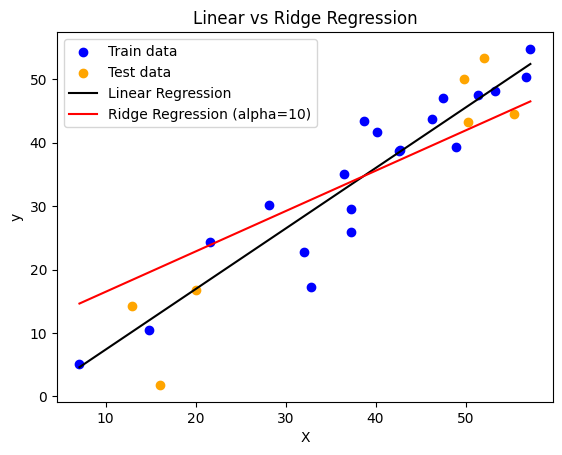

In [55]:
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data')

plt.plot(X_plot, y_lr, color='black', label='Linear Regression')
plt.plot(X_plot, y_rd, color='red', label='Ridge Regression (alpha=10)')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Ridge Regression")
plt.legend()
plt.show()

After splitting the data and scaling features, both Linear Regression and Ridge Regression models were trained on the same dataset. Scaling was essential to ensure Ridge's regularization worked properly. Comparing their prediction lines shows that Ridge Regression, with its alpha value, produces a smoother fit by shrinking coefficients, which can reduce overfitting. This confirms that Ridge helps control model complexity while still fitting the data well. The visualization clearly illustrates how regularization impacts the model compared to standard Linear Regression, making Ridge a valuable tool when dealing with noisy or complex datasets.

# Batch Processing

In [56]:
import csv
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def plot_linear_vs_ridge_lasso(filename, alpha=10, test_size=0.2, random_state=42):
    x = []
    y = []
    with open(filename, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            x.append([float(row[0])])
            y.append(float(row[1]))

    X = np.array(x)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)

    rd = Ridge(alpha=alpha)
    rd.fit(X_train_scaled, y_train)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_scaled = scaler.transform(X_plot)

    y_lr = lr.predict(X_plot_scaled)
    y_rd = rd.predict(X_plot_scaled)
    y_lasso = lasso.predict(X_plot_scaled)

    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='orange', label='Test data')
    plt.plot(X_plot, y_lr, color='black', label='Linear Regression')
    plt.plot(X_plot, y_rd, color='red', label=f'Ridge Regression (alpha={alpha})')
    plt.plot(X_plot, y_lasso, color='green', label=f'Lasso Regression (alpha={alpha})')

    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Linear vs Ridge vs Lasso Regression")
    plt.legend()
    plt.show()


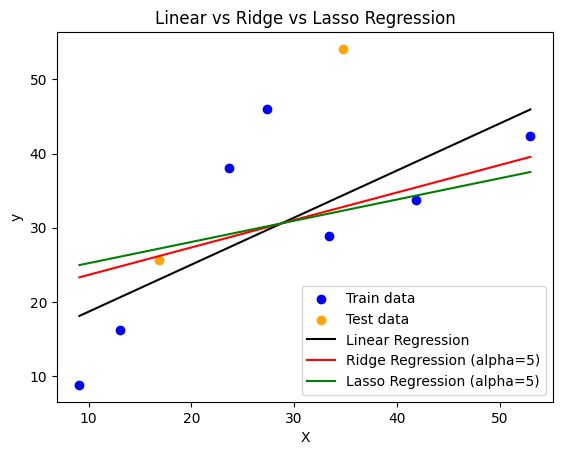

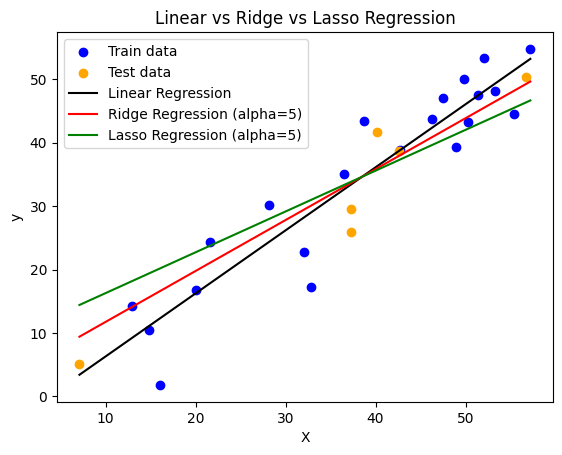

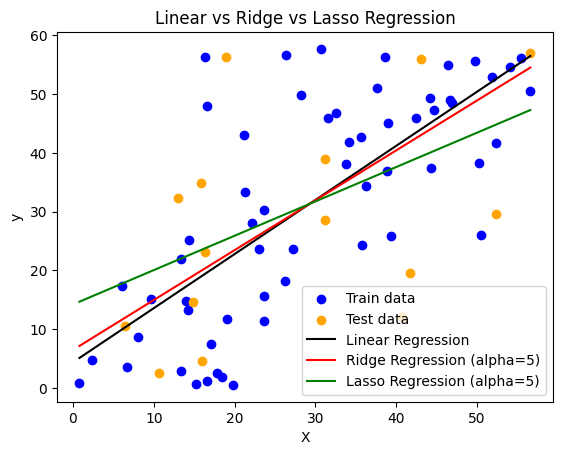

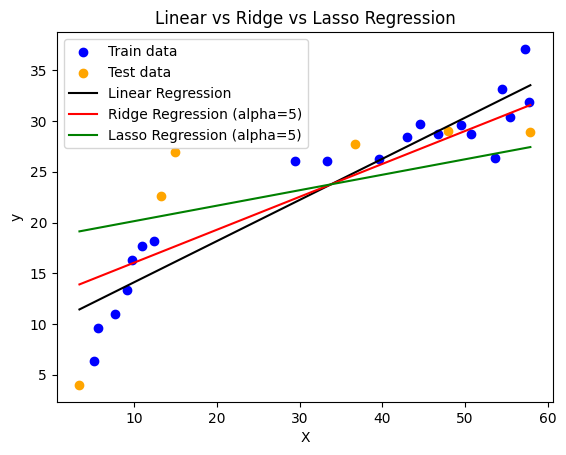

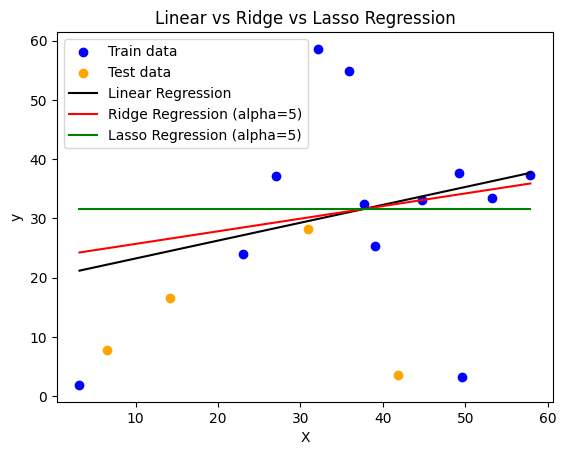

In [57]:
for i in range(3, 8):
  plot_linear_vs_ridge_lasso(f"/content/data{i}.csv", alpha=5)

# Comparison

Linear regression has no regularization and simply fits a line that minimizes the mean squared error, using all features without any feature selection. It is prone to overfitting when the dataset has many features or noise. Lasso regression uses L1 regularization, which adds a penalty equal to the absolute value of the coefficients. This causes some coefficients to shrink to exactly zero, effectively performing feature selection, making it suitable for high-dimensional or sparse data where only a few features are important. Ridge regression uses L2 regularization, which adds a penalty equal to the square of the coefficients. It shrinks coefficients but does not make them exactly zero, so all features remain in the model. Ridge is useful when most features are relevant but regularization is needed to reduce overfitting.